In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Run data

In [2]:
data = pd.read_csv('../data/housing-data.txt')

In [3]:
data.head()

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


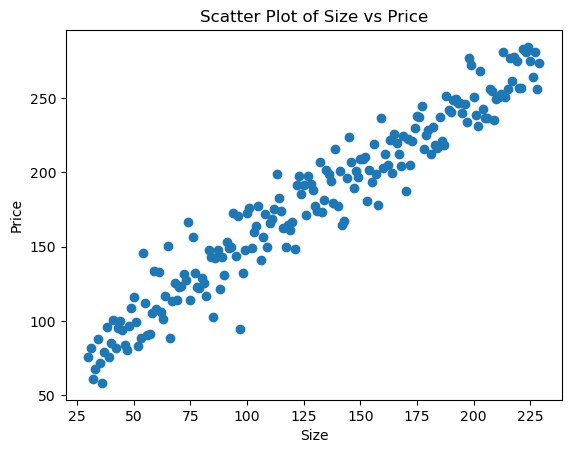

In [4]:
# plot data:
size = data['size']
price = data['price']
plt.scatter(size, price)
# Set the x-axis label
plt.xlabel("Size")

# Set the y-axis label
plt.ylabel("Price")

# Set the title
plt.title("Scatter Plot of Size vs Price")

# Display the plot
plt.show()

### Cost Function:

In [5]:
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    
    # Add a column of 1's to the X-matrix
    X = np.concatenate((np.ones((m, 1)), X), axis=1)    
    # Calculate the hypothesis (predicted values)
    h = np.dot(X, theta)
    
    # Calculate the squared error
    squared_error = (h - y) ** 2
    
    # Calculate the cost
    cost = 1 / (2 * m) * np.sum(squared_error)
    
    return cost

### Gradiant Descent

In [6]:

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # Number of training examples
    cost_history = []  # List to store the cost at each iteration
    # Add a column of 1's to the X-matrix
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
#     theta1_list = list(theta[1])
    for _ in range(num_iters):

        # Compute the hypothesis
        h = np.dot(X, theta)

        # Compute the error
        error = h - y

        # Update theta using gradient descent
        theta = theta - (alpha/m) * np.dot(X.T, error)
#         theta1_list.append(theta[1])

        # Compute the cost and append it to the cost_history list
        cost = compute_cost(X[:, 1:], y, theta)  # Exclude the column of 1's
        cost_history.append(cost)

    return theta, cost_history

In [14]:
X = size.values.reshape(-1, 1)  # Assuming 'size' is a pandas Series
y = price.values.reshape(-1, 1)  # Assuming 'price' is a pandas Series

alpha = 0.00001  # Learning rate
num_iters = 20  # Number of iterations
theta = np.zeros((2, 1))  # Initialize theta with zeros
# theta = np.random.uniform(0, 1,(2, 1))

In [8]:
theta

array([[0.],
       [0.]])

In [9]:
theta[1]

array([0.])

In [15]:
theta1, costs = gradient_descent(X, y, theta, alpha, num_iters)

In [11]:
costs

[70667154912.59772,
 2.8534143881721405e+17,
 1.1521581304563147e+24,
 4.652210219024479e+30,
 1.878479988977207e+37,
 7.584969085356034e+43,
 3.0626760127017162e+50,
 1.2366542636130186e+57,
 4.993390621044456e+63,
 2.0162425851739286e+70,
 8.141230019410192e+76,
 3.2872843137190373e+83,
 1.3273471125934496e+90,
 5.359592262699409e+96,
 2.1641083142345727e+103,
 8.738285612384219e+109,
 3.528364774598081e+116,
 1.4246911276258685e+123,
 5.752650133423573e+129,
 2.3228181123528848e+136]

In [130]:
theta1

array([[-6.02033122e+63],
       [-9.34584791e+65]])

### plot

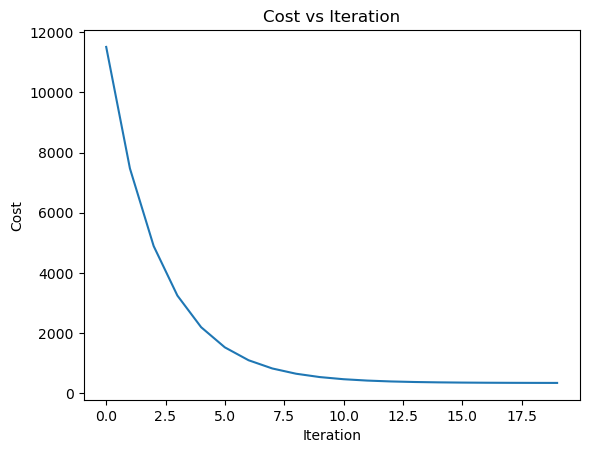

In [16]:
#theta, costs = gradient_descent(X, y, theta, alpha, num_iters)

plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

#### Explanation:
As the plot shows the iteration and the cost are inverse. If the number of iteration goes up, the cost goes down.